# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import ttest_ind, chi2_contingency
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go


In [2]:
import sys
sys.path.append('../src')
from functions import *
# raw data
df_clients_profile = pd.read_csv('../Data/Raw/df_final_demo.txt')
df_web_data_1 = pd.read_csv('../Data/Raw/df_final_web_data_pt_1.txt')
df_web_data_2 = pd.read_csv('../Data/Raw/df_final_web_data_pt_2.txt')
df_experiment_clients = pd.read_csv('../Data/Raw/df_final_experiment_clients.txt')
# processed data
df_test = pd.read_csv('../Data/Cleaned_Data/df_test.csv')
df_test_final = pd.read_csv('../Data/Cleaned_Data/df_test_final.csv')
df_control = pd.read_csv('../Data/Cleaned_Data/df_control.csv')
df_control_final = pd.read_csv('../Data/Cleaned_Data/df_control_final.csv')
df_final = pd.read_csv('../Data/Cleaned_Data/df_final.csv')
df_combined = pd.read_csv('../Data/Cleaned_Data/df_combined.csv')
pd.set_option('display.max_columns', None)
df_web_data = pd.concat([df_web_data_1, df_web_data_2], ignore_index= True)

# Data Preprocessing
### Ensure that the data types are correctly assigned, especially for categorical variables.

In [3]:
df_test = convert_data_types_combined(df_test)
df_test_final = convert_data_types_combined(df_test_final)
df_control = convert_data_types_combined(df_control)
df_control_final = convert_data_types_combined(df_control_final)
df_final = convert_data_types_combined(df_final)
df_combined = convert_data_types_combined(df_combined)

# Correlation between numerical variables

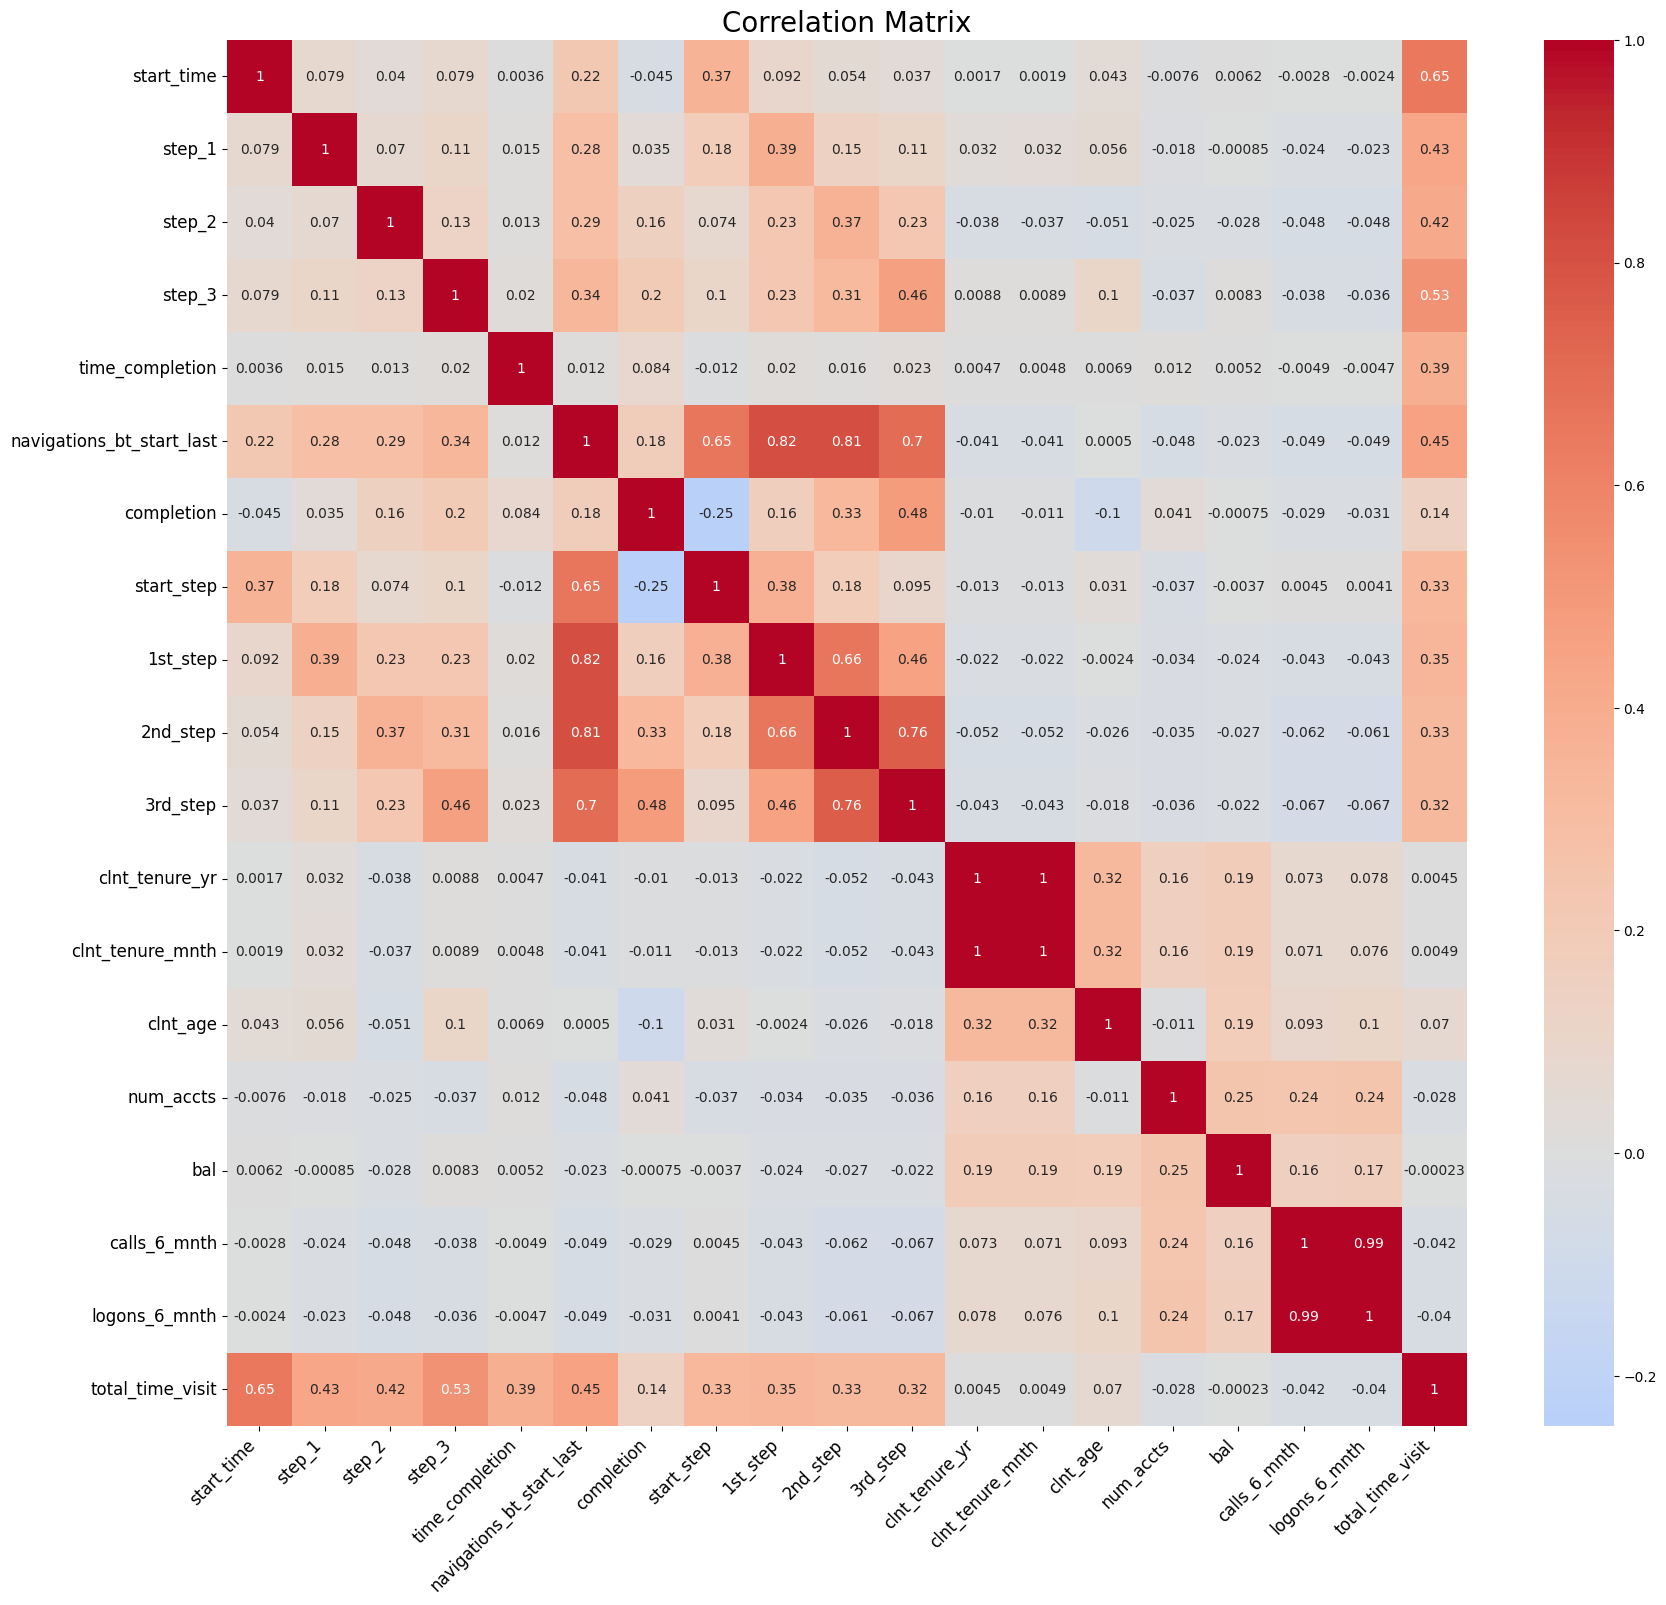

In [4]:
correlation_matrix = df_final.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(20, 18))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, annot_kws={"size": 10})  # Adjust font size
plt.title('Correlation Matrix', fontsize=20)  # Adjust title font size
plt.xticks(rotation=45, ha='right', fontsize=12)  # Adjust x-axis tick labels
plt.yticks(rotation=0, fontsize=12)  # Adjust y-axis tick labels
plt.show()

### Strong Positive Correlations
Calls in Last 6 Months vs. Logons in Last 6 Months (0.99)
This very high correlation indicates that clients who make more calls also tend to log in more frequently.
Navigations Between Start and Last vs. 1st Step (0.81)
Clients who navigate between the start and last step frequently also spend significant time on the 1st step.
Navigations Between Start and Last vs. 2nd Step (0.76)
Similarly, clients who navigate a lot between the start and last steps also spend more time on the 2nd step.
Navigations Between Start and Last vs. 3rd Step (0.71)
There is also a strong correlation indicating that frequent navigators also spend time on the 3rd step.
Total Time Visit vs. Start Time (0.65)
Clients who spend more time on their total visit tend to start earlier.
### Moderate Positive Correlations
Step 1 vs. Step 2 (0.37)
A moderate correlation indicating that clients who complete Step 1 are likely to proceed to Step 2.
Step 1 vs. Step 3 (0.31)
Indicates that clients who complete Step 1 are likely to proceed to Step 3 as well.
Client Age vs. Client Tenure Year (0.32)
Older clients tend to have been with the company for more years.
Number of Accounts vs. Balance (0.25)
Clients with more accounts tend to have a higher balance.
### Strong Negative Correlations
Step 2 vs. Client Tenure Year (-0.38)
Indicates that newer clients are more likely to complete Step 2.
3rd Step vs. Client Tenure Year (-0.43)
Indicates that newer clients are more likely to complete the 3rd step.
### Insights:
Client Engagement:
Clients who make more calls are also the ones who log in more frequently, suggesting that these clients are more engaged.
The time spent on each step correlates positively with navigations between start and last step, indicating that clients who spend more time are thorough in their actions.
New vs. Long-term Clients:
There is a negative correlation between client tenure and the completion of later steps, suggesting that newer clients are more active in completing steps.
Older Clients:
Older clients tend to spend more time on the site and have a longer tenure with the company.
Balance and Accounts:
Clients with more accounts tend to have a higher balance, indicating that diversifying accounts may be a strategy for wealthier clients.

# Hypothesis testing

## 1. Test for Difference in Average Age
#### Null Hypothesis : The average age of clients engaging with the new process (Test) is the same as the average age of clients engaging with the old process (Control).
##### Alternative Hypothesis : The average age of clients engaging with the new process (Test) is different from the average age of clients engaging with the old process (Control).

In [5]:

test_age = df_final[df_final['variation'] == 'Test']['clnt_age']
control_age = df_final[df_final['variation'] == 'Control']['clnt_age']
t_stat_age, p_value_age = ttest_ind(test_age, control_age)
print(f'Age t-statistic: {t_stat_age}, p-value: {p_value_age}')

Age t-statistic: -1.2729794502698868, p-value: 0.20302959685301533


The average age of clients in the Test group is not significantly different from the average age of clients in the Control group.

## 2. Test for Difference in Average Client Tenure
### Null Hypothesis: The average client tenure of those engaging with the new process (Test) is the same as those engaging with the old process (Control).
### Alternative Hypothesis: The average client tenure of those engaging with the new process (Test) is different from those engaging with the old process (Control).

In [6]:
test_tenure = df_final[df_final['variation'] == 'Test']['clnt_tenure_yr']
control_tenure = df_final[df_final['variation'] == 'Control']['clnt_tenure_yr']
t_stat_tenure, p_value_tenure = ttest_ind(test_tenure, control_tenure)
print(f'Tenure t-statistic: {t_stat_tenure}, p-value: {p_value_tenure}')

Tenure t-statistic: -0.05808470998152816, p-value: 0.953681320670213


The average tenure of clients in the Test group is not significantly different from the average tenure of clients in the Control group.

## 3. Test for Gender Differences in Engagement
### Null Hypothesis: Gender does not affect the likelihood of engaging with the new process (Test) or the old process (Control).
### Alternative Hypothesis: Gender affects the likelihood of engaging with the new process (Test) or the old process (Control).

In [7]:
contingency_table_gender_process = pd.crosstab(df_final['gendr'], df_final['variation'])
chi2_stat_gender, p_value_gender, _, _ = chi2_contingency(contingency_table_gender_process)
print(f'Chi-square statistic for gender and process: {chi2_stat_gender}, p-value: {p_value_gender}')

Chi-square statistic for gender and process: 1.539161404659761, p-value: 0.46320724931898305


Gender does not appear to have a significant effect on whether clients engage with the new process (Test) or the old process (Control).

### There is not significant difference in the age (0.20), test (0.95), and tenure (0.46) between the control and the test group.

## 4. Test for completion rate
### Null Hypothesis (H0): There is no significant difference in completion rates between the Test and Control groups.
### Alternative Hypothesis (H1): The completion rate of the Test group is significantly higher than the completion rate of the Control group.

In [8]:
# Compute the contingency table
contingency_table = pd.crosstab(df_final['variation'], df_final['completion'])

# Perform the Chi-square test
chi2_stat_completion, p_value_completion, _, _ = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = contingency_table.sum().sum()  # Total number of observations
min_dimension = min(contingency_table.shape) - 1  # Minimum dimension - 1

cramers_v = np.sqrt((chi2_stat_completion / n) / min_dimension)

# Print the results
print(f'Chi-square statistic for completion rates: {chi2_stat_completion}, p-value: {p_value_completion}')
print(f"Cramér's V for the association between variation and completion: {cramers_v}")

Chi-square statistic for completion rates: 525.6875674507415, p-value: 2.449904079356561e-116
Cramér's V for the association between variation and completion: 0.0870173611252898


### Testing Hypothesis ensuring completion rate from the A/B test meets or exceeds this 5% threshold.

In [9]:
# Calculate Completion Rates
completion_rates = df_final.groupby('variation')['completion'].mean()
completion_rate_test = completion_rates.get('Test', 0)
completion_rate_control = completion_rates.get('Control', 0)
percentage_increase = ((completion_rate_test - completion_rate_control) / completion_rate_control) * 100 if completion_rate_control != 0 else float('inf')

print(f'Completion rate for Test group: {completion_rate_test}')
print(f'Completion rate for Control group: {completion_rate_control}')
print(f'Percentage increase in completion rate: {percentage_increase}%')

Completion rate for Test group: 0.5857757461683248
Completion rate for Control group: 0.49886769039863504
Percentage increase in completion rate: 17.421063228256642%


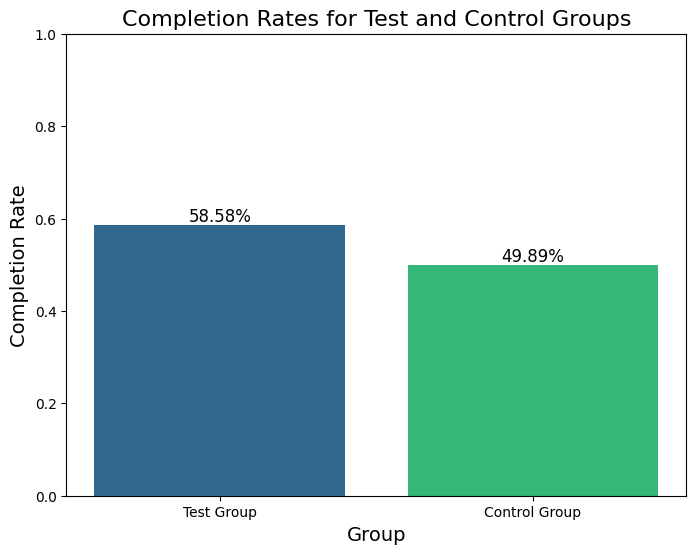

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
completion_rate_test = 0.5857757461683248
completion_rate_control = 0.49886769039863504
percentage_increase = 17.421063228256642

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Use viridis color palette
colors = sns.color_palette("viridis", 2)

# Create bar plot
bars = ax.bar(['Test Group', 'Control Group'], [completion_rate_test, completion_rate_control], color=colors)

# Add text annotations
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom', fontsize=12)

# Add title and labels
ax.set_title('Completion Rates for Test and Control Groups', fontsize=16)
ax.set_ylabel('Completion Rate', fontsize=14)
ax.set_xlabel('Group', fontsize=14)
ax.set_ylim(0, 1)

plt.show()


## 5. Set up the Hypotheses:

### Null Hypothesis (H0): The increase in completion rate is less than 5%.
### Alternative Hypothesis (H1): The increase in completion rate is at least 5%.


In [11]:
# Perform the Two-Proportion Z-Test:
from statsmodels.stats.proportion import proportions_ztest

# Define number of successes (completed visits) and number of trials (total visits) for both groups
num_success_test = df_final[df_final['variation'] == 'Test']['completion'].sum()
num_trials_test = len(df_final[df_final['variation'] == 'Test'])
num_success_control = df_final[df_final['variation'] == 'Control']['completion'].sum()
num_trials_control = len(df_final[df_final['variation'] == 'Control'])


# Perform the two-proportion z-test
successes = [num_success_test, num_success_control]
trials = [num_trials_test, num_trials_control]
z_stat, p_value = proportions_ztest(successes, trials)

z_stat, p_value = proportions_ztest([num_success_test, num_success_control], [num_trials_test, num_trials_control])
print(f'Two-proportion z-test statistic: {z_stat}, p-value: {p_value}')

Two-proportion z-test statistic: 22.935519051858822, p-value: 2.0554268392884194e-116


In [12]:
# Define the threshold for percentage increase
threshold = 5.0
if percentage_increase >= threshold:
    print('The observed increase in completion rate meets or exceeds the 5% threshold.')
else:
    print('The observed increase in completion rate does not meet the 5% threshold.')

if p_value < 0.05:
    print('The increase in completion rate is statistically significant.')
else:
    print('The increase in completion rate is not statistically significant.')


The observed increase in completion rate meets or exceeds the 5% threshold.
The increase in completion rate is statistically significant.


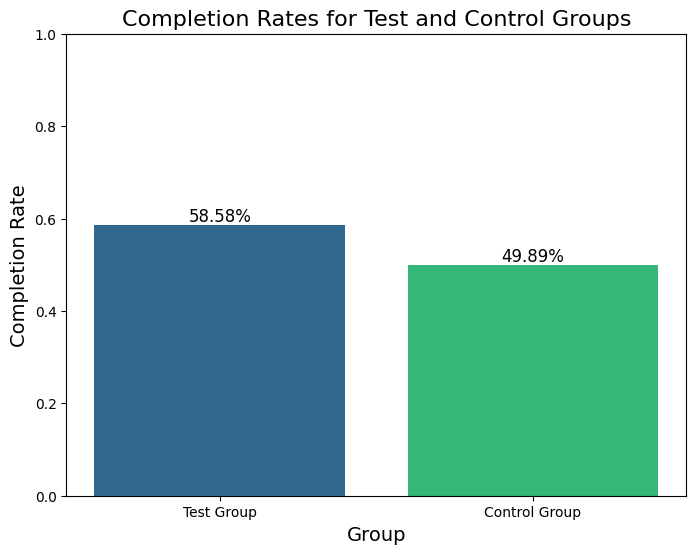

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
completion_rate_test = 0.5857757461683248
completion_rate_control = 0.49886769039863504
percentage_increase = 17.421063228256642

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Use viridis color palette
colors = sns.color_palette("viridis", 2)

# Create bar plot
bars = ax.bar(['Test Group', 'Control Group'], [completion_rate_test, completion_rate_control], color=colors)

# Add text annotations
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom', fontsize=12)

# Add title and labels
ax.set_title('Completion Rates for Test and Control Groups', fontsize=16)
ax.set_ylabel('Completion Rate', fontsize=14)
ax.set_xlabel('Group', fontsize=14)
ax.set_ylim(0, 1)

plt.show()


## 6. Hypothesis on tottal time spent

### Null Hypothesis (H0):  There is no significative difference between the time spent in the new website between test and control groups.
### Alternative Hypothesis (H1): There is a significative difference between the time spent in the new website between test and control groups.

In [14]:
# Calculate the mean of total_time_visit for 'Test' variation
mean_total_time_test = df_final.loc[df_final['variation'] == 'Test', 'total_time_visit'].mean()

# Calculate the mean of total_time_visit for 'Control' variation
mean_total_time_control = df_final.loc[df_final['variation'] == 'Control', 'total_time_visit'].mean()

print(f"Mean total time visit for 'Test' variation: {mean_total_time_test}")
print(f"Mean total time visit for 'Control' variation: {mean_total_time_control}")


Mean total time visit for 'Test' variation: 5.258645872546383
Mean total time visit for 'Control' variation: 4.6747097874980605


In [15]:
# Extract total time visit for each group
test_time = df_final[df_final['variation'] == 'Test']['total_time_visit']
control_time = df_final[df_final['variation'] == 'Control']['total_time_visit']


# Perform t-test
t_stat_time, p_value_time = ttest_ind(test_time, control_time)
print(f'Total time visit t-statistic: {t_stat_time}, p-value: {p_value_time}')

Total time visit t-statistic: 8.190889099465572, p-value: 2.6366449606538235e-16


Reject the null hypothesis. This suggests that there is a statistically significant difference in the total time spent on the site between clients in the Test group (5.25) and clients in the Control group (4.67).

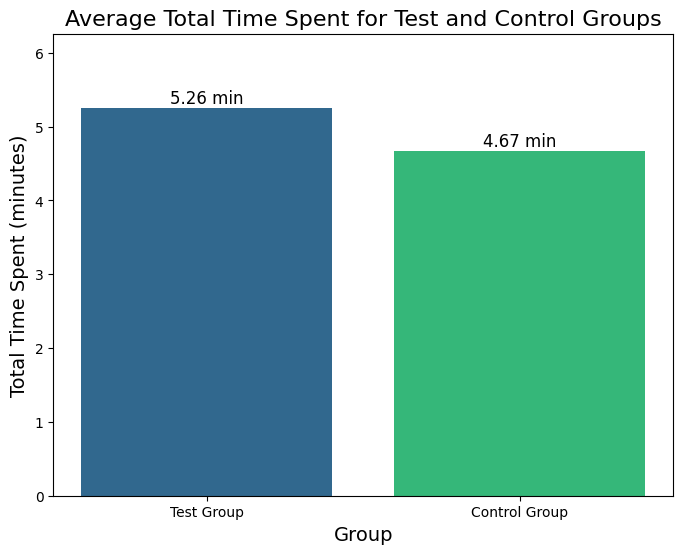

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
mean_total_time_test = 5.258645872546383
mean_total_time_control = 4.6747097874980605

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Use viridis color palette
colors = sns.color_palette("viridis", 2)

# Create bar plot
bars = ax.bar(['Test Group', 'Control Group'], [mean_total_time_test, mean_total_time_control], color=colors)

# Add text annotations
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f} min', ha='center', va='bottom', fontsize=12)

# Add title and labels
ax.set_title('Average Total Time Spent for Test and Control Groups', fontsize=16)
ax.set_ylabel('Total Time Spent (minutes)', fontsize=14)
ax.set_xlabel('Group', fontsize=14)
ax.set_ylim(0, max(mean_total_time_test, mean_total_time_control) + 1)

plt.show()


## 7. Hypothesis on Number of Accounts

### Null Hypothesis (H0):  The average number of accounts is the same for clients engaging with the new process (Test) and those engaging with the old process (Control).
### Alternative Hypothesis (H1):The average number of accounts is different for clients engaging with the new process and those engaging with the old process.

In [17]:
# Extract number of accounts for each group
test_accounts = df_final[df_final['variation'] == 'Test']['num_accts']
control_accounts = df_final[df_final['variation'] == 'Control']['num_accts']

# Perform t-test
t_stat_accounts, p_value_accounts = ttest_ind(test_accounts, control_accounts)
print(f'Number of accounts t-statistic: {t_stat_accounts}, p-value: {p_value_accounts}')

Number of accounts t-statistic: -2.39607455298703, p-value: 0.016574349209449127


Reject the null hypothesis. This indicates that there is a statistically significant difference in the number of accounts between the Test group and the Control group.

## 8. Hypothesis: 

### Null Hypothesis (H0):  The average logons is the same for clients engaging with the new process (Test) and those engaging with the old process (Control).
### Alternative Hypothesis (H1): The average logons is different for clients engaging with the new process and those engaging with the old process.



In [18]:
# Calculate the mean of total_time_visit for 'Test' variation
mean_logons_test = df_final.loc[df_final['variation'] == 'Test', 'logons_6_mnth'].mean()

# Calculate the mean of total_time_visit for 'Control' variation
mean_logons_control = df_final.loc[df_final['variation'] == 'Control', 'logons_6_mnth'].mean()

print(f"Mean logons for 'Test' variation: {mean_total_time_test}")
print(f"Mean logons for 'Control' variation: {mean_total_time_control}")

Mean logons for 'Test' variation: 5.258645872546383
Mean logons for 'Control' variation: 4.6747097874980605


In [19]:
test_logons = df_final[df_final['variation'] == 'Test']['logons_6_mnth']
control_logons = df_final[df_final['variation'] == 'Control']['logons_6_mnth']
t_stat_balances, p_value_balances = ttest_ind(test_logons, control_logons)
print(f'Balance t-statistic: {t_stat_balances}, p-value: {p_value_balances}')

Balance t-statistic: -3.196715530818049, p-value: 0.0013906417590579738


 Reject the null hypothesis. This implies that there is a statistically difference in the average balance between the Test group (5.25) and the Control group (4.67).

In [20]:
test_calls = df_final[df_final['variation'] == 'Test']['calls_6_mnth']
control_calls = df_final[df_final['variation'] == 'Control']['calls_6_mnth']
t_stat_calls, p_value_calls = ttest_ind(test_calls, control_calls)
print(f'Calls in last 6 months t-statistic: {t_stat_calls}, p-value: {p_value_calls}')


Calls in last 6 months t-statistic: -3.318427950676876, p-value: 0.0009057220749475691


In [21]:
# Extract recent call activity for each group
test_navigations = df_final[df_final['variation'] == 'Test']['navigations_bt_start_last']
control_navigations = df_final[df_final['variation'] == 'Control']['navigations_bt_start_last']

# Perform t-test
t_stat_navigations, p_value_navigations = ttest_ind(test_navigations, control_navigations)
print(f'Navigations between start and last t-statistic: {t_stat_navigations}, p-value: {p_value_navigations}')

Navigations between start and last t-statistic: 8.702182915655731, p-value: 3.3252860422972968e-18


Reject the null hypothesis. This means that there is a statistically significant difference in the number of calls in the last 6 months between the Test group (new process) and the Control group (old process).

In [22]:
test_navigations = df_final[df_final['variation'] == 'Test']['navigations_bt_start_last']
control_navigations = df_final[df_final['variation'] == 'Control']['navigations_bt_start_last']

In [23]:
t_stat_navigations, p_value_navigations = ttest_ind(test_navigations, control_navigations)
print(f'Navigations between start and last t-statistic: {t_stat_navigations}, p-value: {p_value_navigations}')

Navigations between start and last t-statistic: 8.702182915655731, p-value: 3.3252860422972968e-18


Reject the null hypothesis. This means that there is a statistically significant difference in the number of navigations between the Test and Control groups.

Contextualize Findings:
If the Test group has more navigations: This might indicate increased user activity or engagement with the new process.
If the Test group has fewer navigations: This could suggest that the new process is more efficient or requires fewer steps.
Needs further investigations

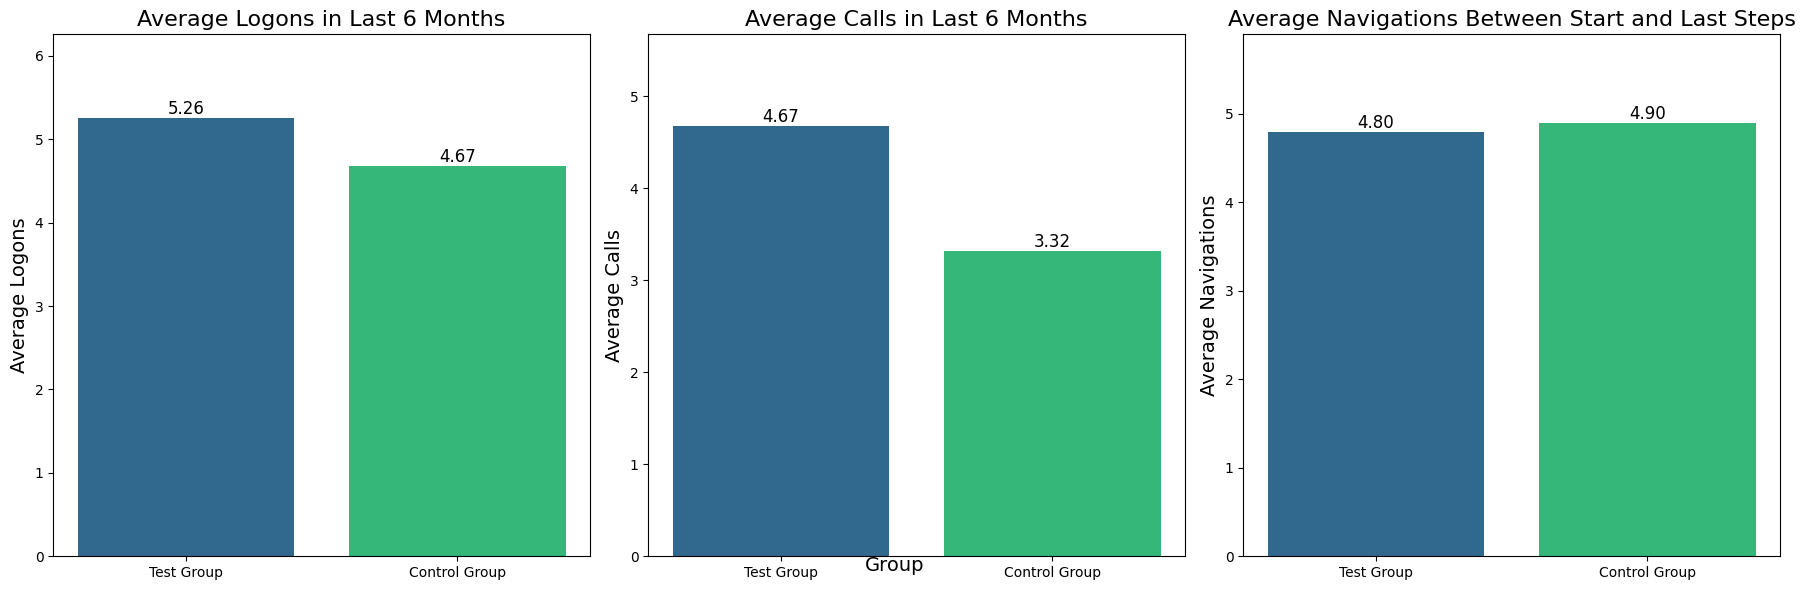

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
mean_logons_test = 5.258645872546383
mean_logons_control = 4.6747097874980605

mean_calls_test = 4.6747097874980605  # Example values, replace with actual
mean_calls_control = 3.318472950676876

mean_navigations_test = 4.8  # Example values, replace with actual
mean_navigations_control = 4.9

# Use viridis color palette
colors = sns.color_palette("viridis", 2)

# Plot side by side
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot logons
bars = ax[0].bar(['Test Group', 'Control Group'], [mean_logons_test, mean_logons_control], color=colors)
for bar in bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)
ax[0].set_title('Average Logons in Last 6 Months', fontsize=16)
ax[0].set_ylabel('Average Logons', fontsize=14)
ax[0].set_ylim(0, max(mean_logons_test, mean_logons_control) + 1)

# Plot calls
bars = ax[1].bar(['Test Group', 'Control Group'], [mean_calls_test, mean_calls_control], color=colors)
for bar in bars:
    yval = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)
ax[1].set_title('Average Calls in Last 6 Months', fontsize=16)
ax[1].set_ylabel('Average Calls', fontsize=14)
ax[1].set_ylim(0, max(mean_calls_test, mean_calls_control) + 1)

# Plot navigations
bars = ax[2].bar(['Test Group', 'Control Group'], [mean_navigations_test, mean_navigations_control], color=colors)
for bar in bars:
    yval = bar.get_height()
    ax[2].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=12)
ax[2].set_title('Average Navigations Between Start and Last Steps', fontsize=16)
ax[2].set_ylabel('Average Navigations', fontsize=14)
ax[2].set_ylim(0, max(mean_navigations_test, mean_navigations_control) + 1)

# Add common labels
fig.text(0.5, 0.04, 'Group', ha='center', fontsize=14)
plt.tight_layout()
plt.show()


Analysis and Recommendations
1. Average Logons:
Finding: The Test group has significantly more logons (5.26) compared to the Control group (4.67).
Recommendation: Investigate what features or design elements in the new website contribute to higher logon rates. Consider conducting user interviews or surveys to gather qualitative feedback.
2. Average Calls:
Finding: The number of calls in the last 6 months is significantly different between the Test group and the Control group (t-statistic: -3.32, p-value: 0.0009).
Recommendation: Analyze the nature of calls (e.g., support queries, complaints, or feedback) to understand why users are calling more. This will help in identifying potential usability issues or areas for improvement in the new website.
3. Average Navigations:
Finding: There is a statistically significant difference in the number of navigations between the start and last steps between the Test and Control groups (t-statistic: 8.70, p-value: 3.33e-18).
Recommendation: Examine the navigation patterns to identify if users are struggling with specific steps. Consider implementing user testing sessions to observe how users interact with the site and identify any confusing elements.

### 9. Hypothesis Testing for error rates

### Null Hypothesis (H0): There is no significant difference in the error rates between the Test and Control groups.
### Alternative Hypothesis (H1): There is a significant difference in the error rates between the Test and Control groups.

In [25]:
import pandas as pd
from scipy.stats import chi2_contingency

# Example DataFrame creation (replace with actual data loading code)
# df_combined = pd.read_csv('your_file.csv')

# Convert date_time to pandas datetime format
df_combined['date_time'] = pd.to_datetime(df_combined['date_time'])

# Sort by client_id and date_time
df_combined = df_combined.sort_values(by=['client_id', 'date_time'])

# Calculate the time difference to the previous step
df_combined['time_to_previous_step'] = df_combined.groupby('client_id')['date_time'].diff().dt.total_seconds()

# Identify errors: going back to any previous step in less than 30 seconds
df_combined['is_error'] = df_combined['time_to_previous_step'] < 30

# Count errors and non-errors
errors_test = df_combined[(df_combined['Variation'] == 'Test') & (df_combined['is_error'])].shape[0]
non_errors_test = df_combined[(df_combined['Variation'] == 'Test') & (~df_combined['is_error'])].shape[0]

errors_control = df_combined[(df_combined['Variation'] == 'Control') & (df_combined['is_error'])].shape[0]
non_errors_control = df_combined[(df_combined['Variation'] == 'Control') & (~df_combined['is_error'])].shape[0]

# Calculate total observations for each group
total_test = errors_test + non_errors_test
total_control = errors_control + non_errors_control

# Compute error rates
error_rate_test = errors_test / total_test if total_test > 0 else 0
error_rate_control = errors_control / total_control if total_control > 0 else 0

# Print error rates
print(f'Error rate for Test group: {error_rate_test:.4f}')
print(f'Error rate for Control group: {error_rate_control:.4f}')

# Create a contingency table
contingency_table = [
    [errors_test, non_errors_test],  # Test group
    [errors_control, non_errors_control]  # Control group
]

# Perform the Chi-Square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2_stat:.4f}, p-value: {p_value:.4f}')

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in error rates between the Test and Control groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in error rates between the Test and Control groups.")

Error rate for Test group: 0.3626
Error rate for Control group: 0.3506
Chi-square statistic: 49.0335, p-value: 0.0000
Reject the null hypothesis. There is a significant difference in error rates between the Test and Control groups.


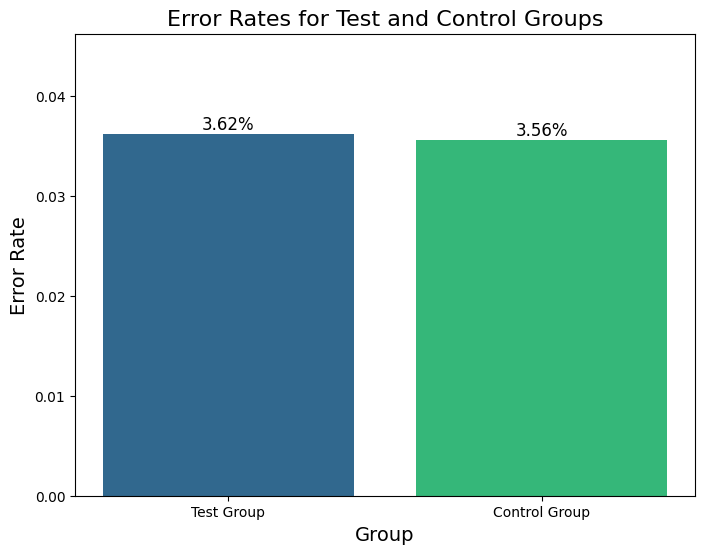

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
error_rate_test = 0.0362
error_rate_control = 0.0356

# Use viridis color palette
colors = sns.color_palette("viridis", 2)

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create bar plot
bars = ax.bar(['Test Group', 'Control Group'], [error_rate_test, error_rate_control], color=colors)

# Add text annotations
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom', fontsize=12)

# Add title and labels
ax.set_title('Error Rates for Test and Control Groups', fontsize=16)
ax.set_ylabel('Error Rate', fontsize=14)
ax.set_xlabel('Group', fontsize=14)
ax.set_ylim(0, max(error_rate_test, error_rate_control) + 0.01)

plt.show()


In [27]:
df_test_final['navigations_bt_start_last'].value_counts()

navigations_bt_start_last
5    3238
Name: count, dtype: int64

# Visualization of different parameters

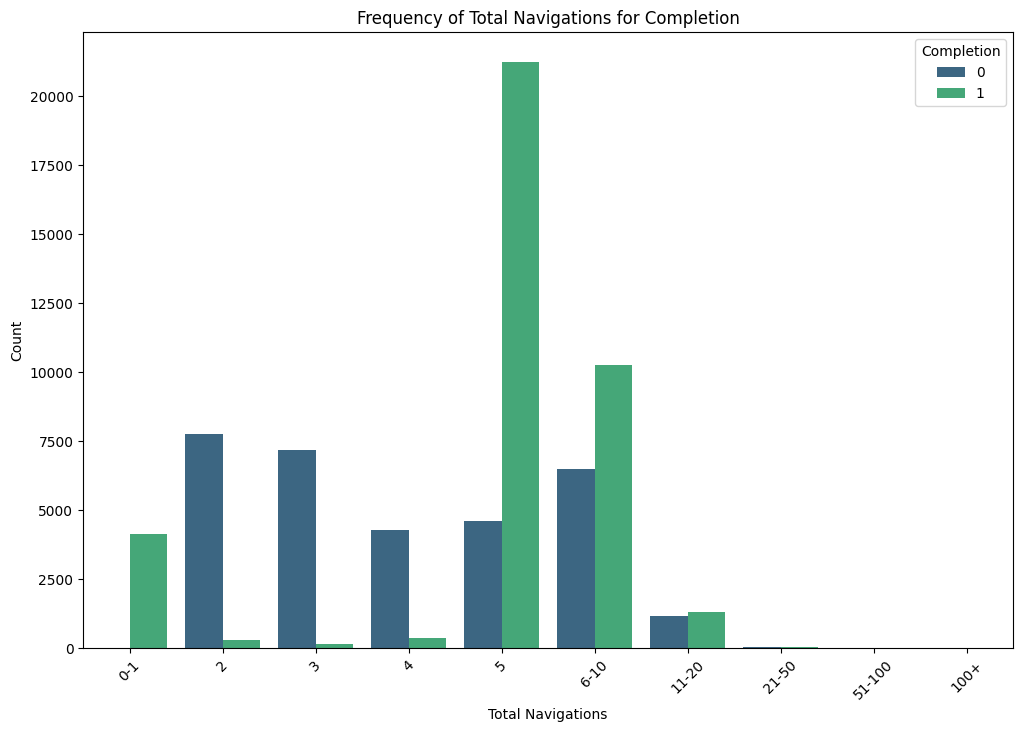

In [28]:
# Create a new column categorizing the total number of navigations
df_final['total_navigations_category'] = pd.cut(df_final['navigations_bt_start_last'], 
                                                bins=[0, 1, 2, 3, 4, 5, 10, 20, 50, 100, np.inf], 
                                                labels=['0-1', '2', '3', '4', '5', '6-10', '11-20', '21-50', '51-100', '100+'])

# Plot the frequency of total navigations for completion
plt.figure(figsize=(12, 8))
sns.countplot(data=df_final, x='total_navigations_category', hue='completion', palette='viridis')
plt.title('Frequency of Total Navigations for Completion')
plt.xlabel('Total Navigations')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Completion', loc='upper right')
plt.show()

/tmp/ipykernel_6896/2819631189.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final[df_final['variation'] == 'Test'],
/tmp/ipykernel_6896/2819631189.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_final[df_final['variation'] == 'Control'],


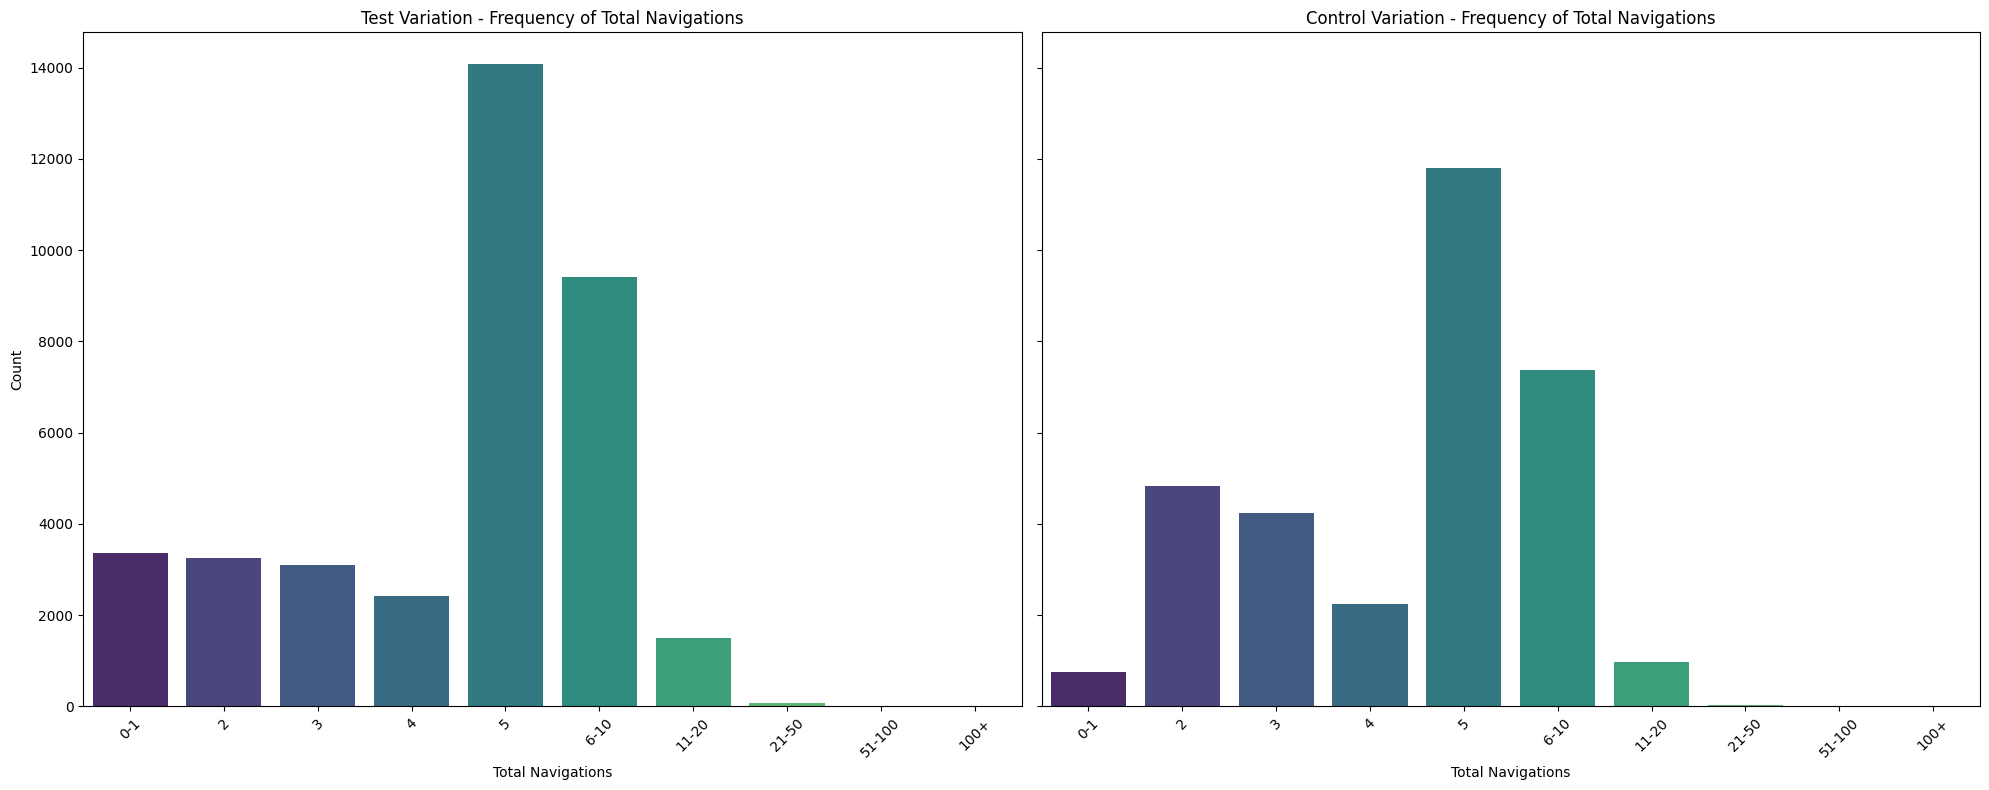

In [29]:
# We will create a frequency plot for total navigations based on completion status

# Create a new column categorizing the total number of navigations
df_final['total_navigations_category'] = pd.cut(df_final['navigations_bt_start_last'], 
                                                bins=[0, 1, 2, 3, 4, 5, 10, 20, 50, 100, np.inf], 
                                                labels=['0-1', '2', '3', '4', '5', '6-10', '11-20', '21-50', '51-100', '100+'])

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Plot for the Test variation
sns.countplot(data=df_final[df_final['variation'] == 'Test'], 
              x='total_navigations_category', 
              palette='viridis', 
              ax=axes[0])
axes[0].set_title('Test Variation - Frequency of Total Navigations')
axes[0].set_xlabel('Total Navigations')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot for the Control variation
sns.countplot(data=df_final[df_final['variation'] == 'Control'], 
              x='total_navigations_category', 
              palette='viridis', 
              ax=axes[1])
axes[1].set_title('Control Variation - Frequency of Total Navigations')
axes[1].set_xlabel('Total Navigations')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


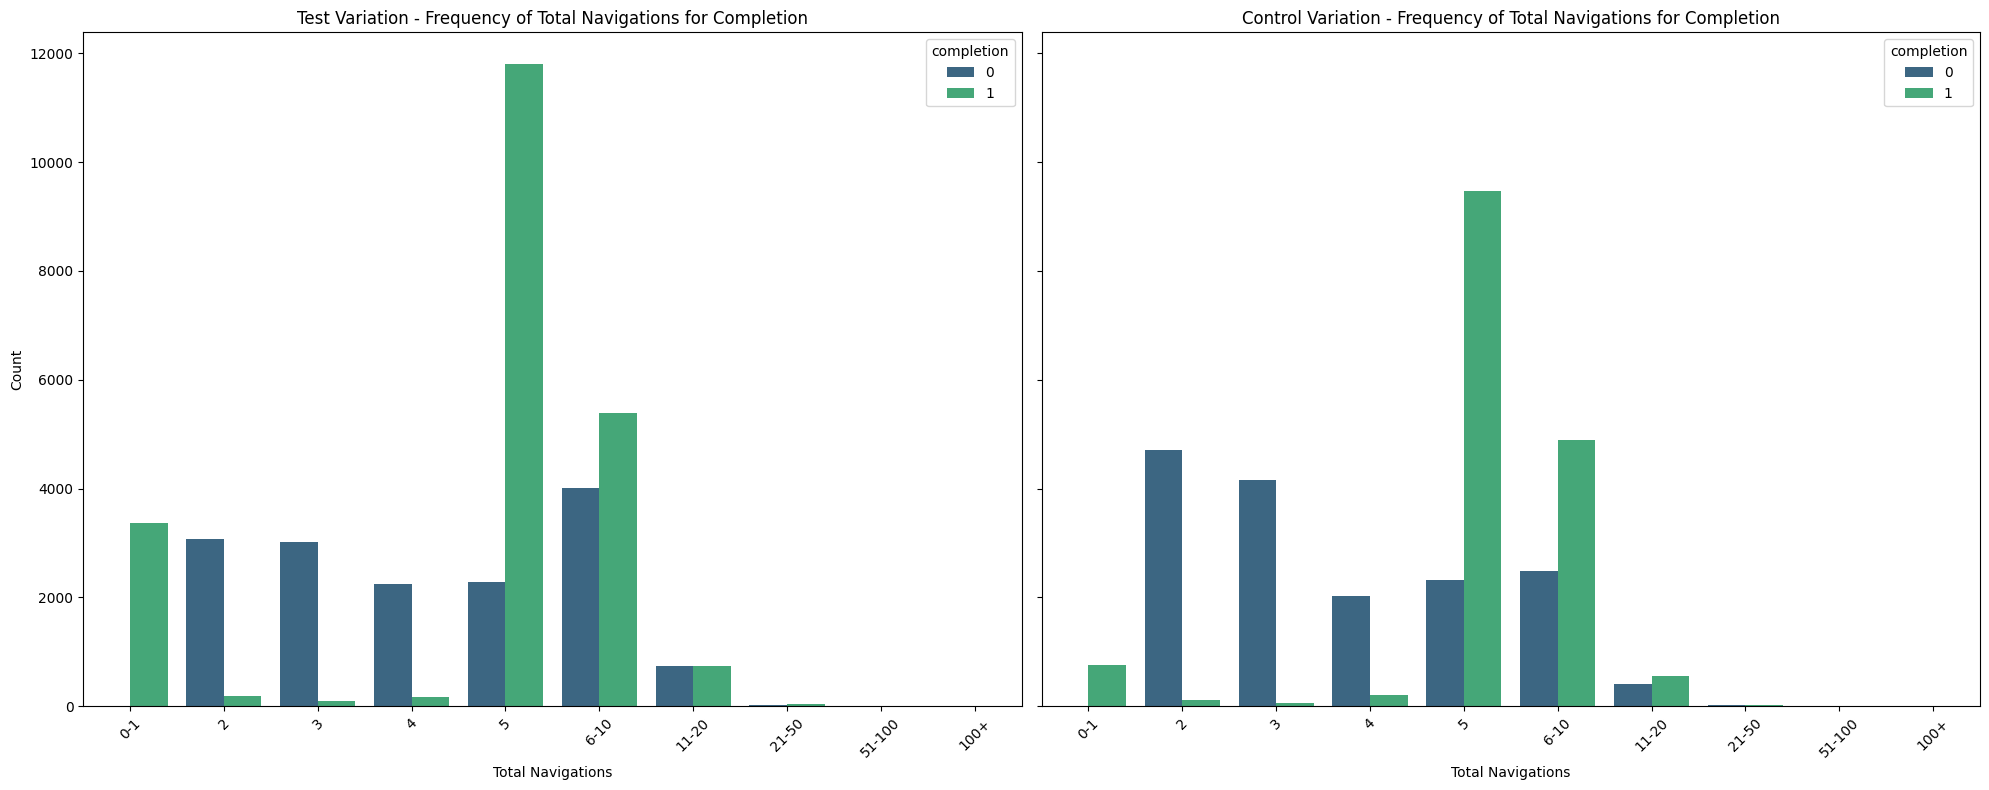

In [30]:
# We will create a frequency plot for total navigations based on completion status

# Create a new column categorizing the total number of navigations
df_final['total_navigations_category'] = pd.cut(df_final['navigations_bt_start_last'], 
                                                bins=[0, 1, 2, 3, 4, 5, 10, 20, 50, 100, np.inf], 
                                                labels=['0-1', '2', '3', '4', '5', '6-10', '11-20', '21-50', '51-100', '100+'])

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Plot for the Test variation
sns.countplot(data=df_final[df_final['variation'] == 'Test'], 
              x='total_navigations_category', 
              hue='completion', 
              palette='viridis', 
              ax=axes[0])
axes[0].set_title('Test Variation - Frequency of Total Navigations for Completion')
axes[0].set_xlabel('Total Navigations')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot for the Control variation
sns.countplot(data=df_final[df_final['variation'] == 'Control'], 
              x='total_navigations_category', 
              hue='completion', 
              palette='viridis', 
              ax=axes[1])
axes[1].set_title('Control Variation - Frequency of Total Navigations for Completion')
axes[1].set_xlabel('Total Navigations')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()



In [31]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

# Assuming error_rate_test, completion_rate_test, error_rate_control, and completion_rate_control are pandas Series or similar structures
# Example data for illustration (replace with actual data)
dates = pd.date_range(start='2023-01-01', periods=10, freq='D')
error_rate_test = pd.Series(np.random.rand(10) / 10, index=dates)
completion_rate_test = pd.Series(np.random.rand(10) / 10, index=dates)
error_rate_control = pd.Series(np.random.rand(10) / 10, index=dates)
completion_rate_control = pd.Series(np.random.rand(10) / 10, index=dates)

# Create a scatter plot with lines for error rate vs. completion rate
fig = go.Figure()

# Line+scatter for test data error rate
fig.add_trace(go.Scatter(
    x=error_rate_test.index,
    y=error_rate_test.values,
    mode='lines+markers',
    name='Test Data Error Rate',
    line=dict(shape='linear', color='rgb(68, 1, 84)')  # Color similar to viridis palette
))

# Line+scatter for test data completion rate
fig.add_trace(go.Scatter(
    x=completion_rate_test.index,
    y=completion_rate_test.values,
    mode='lines+markers',
    name='Test Data Completion Rate',
    line=dict(shape='linear', color='rgb(49, 104, 142)')  # Color similar to viridis palette
))

# Line+scatter for control data error rate
fig.add_trace(go.Scatter(
    x=error_rate_control.index,
    y=error_rate_control.values,
    mode='lines+markers',
    name='Control Data Error Rate',
    line=dict(shape='linear', color='rgb(33, 145, 140)')  # Color similar to viridis palette
))

# Line+scatter for control data completion rate
fig.add_trace(go.Scatter(
    x=completion_rate_control.index,
    y=completion_rate_control.values,
    mode='lines+markers',
    name='Control Data Completion Rate',
    line=dict(shape='linear', color='rgb(253, 231, 37)')  # Color similar to viridis palette
))

# Update layout
fig.update_layout(
    title='Completion Rate vs. Error Rate (Test and Control Data)',
    xaxis_title='Date',
    yaxis_title='Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Rate Type'
)

# Show the plot
fig.show()


In [32]:

# Assuming df_final is already loaded and processed

# Filter the dataframe for navigations <= 30 and completion = 1
filtered_df = df_final[(df_final['navigations_bt_start_last'] <= 30) & (df_final['completion'] == 1)]

# Calculate the frequency of 'navigations_bt_start_last' for each variation
freq = filtered_df.groupby('variation')['navigations_bt_start_last'].value_counts().unstack().fillna(0)

# Normalize the frequencies
norm_freq = freq.div(freq.sum(axis=1), axis=0)

# Reset index for plotting
norm_freq = norm_freq.reset_index()

# Melt DataFrame for easier plotting
norm_freq_melted = norm_freq.melt(id_vars='variation', var_name='Navigations', value_name='Normalized Frequency')

# Define viridis-like colors for the variations
colors = {
    'Test': 'rgb(68, 1, 84)',
    'Control': 'rgb(49, 104, 142)'
}

# Create the figure
fig = go.Figure()

# Add traces for each variation
for variation in norm_freq_melted['variation'].unique():
    df_variation = norm_freq_melted[norm_freq_melted['variation'] == variation]
    fig.add_trace(go.Scatter(
        x=df_variation['Navigations'],
        y=df_variation['Normalized Frequency'],
        mode='lines+markers',
        name=variation,
        line=dict(color=colors[variation])
    ))

# Update layout
fig.update_layout(
    title='Total Navigations done between start and last page by users who completed the process',
    xaxis_title='Navigations',
    yaxis_title='Normalized Frequency',
    legend_title='Variation',
    template='plotly_white'
)

# Show plot
fig.show()


In [33]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure date column is in datetime format
df_final['date'] = pd.to_datetime(df_final['date'])

# Add a 'week' column to the DataFrame
df_final['week'] = df_final['date'].dt.to_period('W').apply(lambda r: r.start_time)

# Calculate weekly completion rate for Test and Control variations
weekly_completion = df_final.groupby(['week', 'variation'])['completion'].mean().unstack()

# Define viridis-like colors for the variations
colors = {
    'Test': 'rgb(68, 1, 84)',       # Purple
    'Control': 'rgb(253, 231, 37)'  # Yellow
}

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=weekly_completion.index,
    y=weekly_completion['Test'],
    mode='lines+markers',
    name='Test Data',
    line=dict(shape='linear', color=colors['Test'])
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=weekly_completion.index,
    y=weekly_completion['Control'],
    mode='lines+markers',
    name='Control Data',
    line=dict(shape='linear', color=colors['Control'])
))

# Update layout
fig.update_layout(
    title='Weekly Completion Rate for Test and Control Data',
    xaxis_title='Week',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source',
    template='plotly_white'
)

# Show the plot
fig.show()


In [34]:
# Convert 'date' columns to datetime
df_test_final['date'] = pd.to_datetime(df_test_final['date'])
df_control_final['date'] = pd.to_datetime(df_control_final['date'])

# Filter data where total_navigations is 5
filtered_test_df = df_test_final[df_test_final['navigations_bt_start_last'] == 5]
filtered_control_df = df_control_final[df_control_final['navigations_bt_start_last'] == 5]

# Count occurrences of total_navigations = 5 by date for test data
counts_test = filtered_test_df.groupby(filtered_test_df['date'].dt.date).size()

# Count occurrences of total_navigations = 5 by date for control data
counts_control = filtered_control_df.groupby(filtered_control_df['date'].dt.date).size()

# Define viridis-like colors for the variations
colors = {
    'Test': 'rgb(68, 1, 84)',       # Purple
    'Control': 'rgb(253, 231, 37)'  # Yellow
}

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=counts_test.index,
    y=counts_test.values,
    mode='lines+markers',
    name='Test Data',
    line=dict(shape='linear', color=colors['Test'])
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=counts_control.index,
    y=counts_control.values,
    mode='lines+markers',
    name='Control Data',
    line=dict(shape='linear', color=colors['Control'])
))

# Update layout
fig.update_layout(
    title='Frequency of Total Steps Taken = 5 by Date',
    xaxis_title='Date',
    yaxis_title='Frequency of Total Steps Taken = 5',
    legend_title_text='Data Source',
    template='plotly_white'
)

# Show the plot
fig.show()



In [35]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

# Assuming df_test and df_control are already loaded and processed
df_test['date_time'] = pd.to_datetime(df_test['date_time'])
df_control['date_time'] = pd.to_datetime(df_control['date_time'])

# Calculate rates for test data
error_rate_test, completion_rate_test = calculate_rates(df_test)

# Calculate rates for control data
error_rate_control, completion_rate_control = calculate_rates(df_control)

# Create a figure with two vertical subplots
fig = make_subplots(rows=2, cols=1, 
                    subplot_titles=("Error Rate", "Completion Rate"),
                    shared_xaxes=True,
                    vertical_spacing=0.1)

# Define colors from the viridis palette
colors = {
    'Test Data Error Rate': 'rgb(68, 1, 84)',  # Deep purple
    'Control Data Error Rate': 'rgb(49, 104, 142)',  # Blue
    'Test Data Completion Rate': 'rgb(33, 145, 140)',  # Teal
    'Control Data Completion Rate': 'rgb(253, 231, 37)'  # Yellow
}

# Error Rate Graph
fig.add_trace(go.Scatter(
    x=error_rate_test.index,
    y=error_rate_test.values,
    mode='lines+markers',
    name='Test Data Error Rate',
    line=dict(shape='linear', color=colors['Test Data Error Rate'])
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=error_rate_control.index,
    y=error_rate_control.values,
    mode='lines+markers',
    name='Control Data Error Rate',
    line=dict(shape='linear', color=colors['Control Data Error Rate'])
), row=1, col=1)

# Completion Rate Graph
fig.add_trace(go.Scatter(
    x=completion_rate_test.index,
    y=completion_rate_test.values,
    mode='lines+markers',
    name='Test Data Completion Rate',
    line=dict(shape='linear', color=colors['Test Data Completion Rate'])
), row=2, col=1)

fig.add_trace(go.Scatter(
    x=completion_rate_control.index,
    y=completion_rate_control.values,
    mode='lines+markers',
    name='Control Data Completion Rate',
    line=dict(shape='linear', color=colors['Control Data Completion Rate'])
), row=2, col=1)

# Update layout
fig.update_layout(
    title_text="Error Rate and Completion Rate (Test and Control Data)",
    height=800,
    width=1000,
)

fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_yaxes(title_text="Error Rate", tickformat=".0%", row=1, col=1)
fig.update_yaxes(title_text="Completion Rate", tickformat=".0%", row=2, col=1)

# Show the figure
fig.show()


In [36]:
from scipy.stats import shapiro

# Check normality for total_navigations
stat, p = shapiro(df_test_final['navigations_bt_start_last'])
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Shapiro-Wilk Test: Statistics=1.000, p=1.000
Sample looks Gaussian (fail to reject H0)


/home/danicoco/Escritorio/IronHack-DataAnalysis/5. week-five/project_2/.venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: Input data has range zero. The results may not be accurate.



In [37]:
from scipy.stats import spearmanr, kendalltau

# Spearman correlation for test data
spearman_corr, spearman_p = spearmanr(df_test_final['navigations_bt_start_last'], df_test_final['completion'])
print(f'Spearman correlation: {spearman_corr}, p-value: {spearman_p}')

# Kendall's Tau correlation for test data
kendall_corr, kendall_p = kendalltau(df_test_final['navigations_bt_start_last'], df_test_final['completion'])
print(f'Kendall Tau correlation: {kendall_corr}, p-value: {kendall_p}')

Spearman correlation: nan, p-value: nan
Kendall Tau correlation: nan, p-value: nan


/tmp/ipykernel_6896/708016844.py:4: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



# Step by step EDA for numerical columns

In [38]:
from scipy.stats import shapiro
shapiro_test = shapiro(df_test_final['navigations_bt_start_last'])
print(shapiro_test)

ShapiroResult(statistic=1.0, pvalue=1.0)


# Test A/B

## Gender Distribution

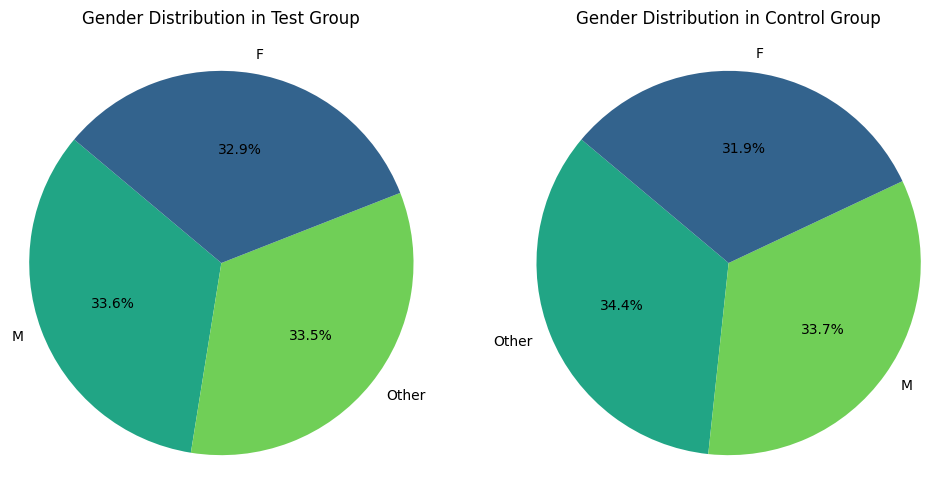

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'df_test' and 'df_control' DataFrames are already defined and have a 'gendr' column

# Get gender distribution tables
tab_test_gender = df_test['gendr'].value_counts().reset_index(name='count')
tab_control_gender = df_control['gendr'].value_counts().reset_index(name='count')

# Create subplots for side-by-side pie charts
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# --- Custom Viridis-inspired colormap ---

# Get Viridis colors (more than needed)
viridis_colors = plt.cm.viridis(np.linspace(0, 1, 256))  

# Extract specific color indices to get shades of pink, blue, and green
# You might want to play around with these indices to find the exact shades you like
pink_index = 150
blue_index = 200
green_index = 80

custom_colors = [viridis_colors[pink_index], viridis_colors[blue_index], viridis_colors[green_index]]

# --- Plot Pie Charts ---

# Pie chart for test group (left subplot)
axs[0].pie(tab_test_gender['count'], labels=tab_test_gender['gendr'], autopct='%1.1f%%', 
           startangle=140, colors=custom_colors[:len(tab_test_gender)])
axs[0].set_title('Gender Distribution in Test Group')

# Pie chart for control group (right subplot)
axs[1].pie(tab_control_gender['count'], labels=tab_control_gender['gendr'], autopct='%1.1f%%', 
           startangle=140, colors=custom_colors[:len(tab_control_gender)])
axs[1].set_title('Gender Distribution in Control Group')

# Equal aspect ratio for circular shape
axs[0].axis('equal')
axs[1].axis('equal')

# Show the plot
plt.show()




## Tenure Distribution

/tmp/ipykernel_6896/2601223321.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_6896/2601223321.py:19: UserWarning:

Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14

/tmp/ipykernel_6896/2601223321.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_6896/2601223321.py:26: UserWarning:

Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14



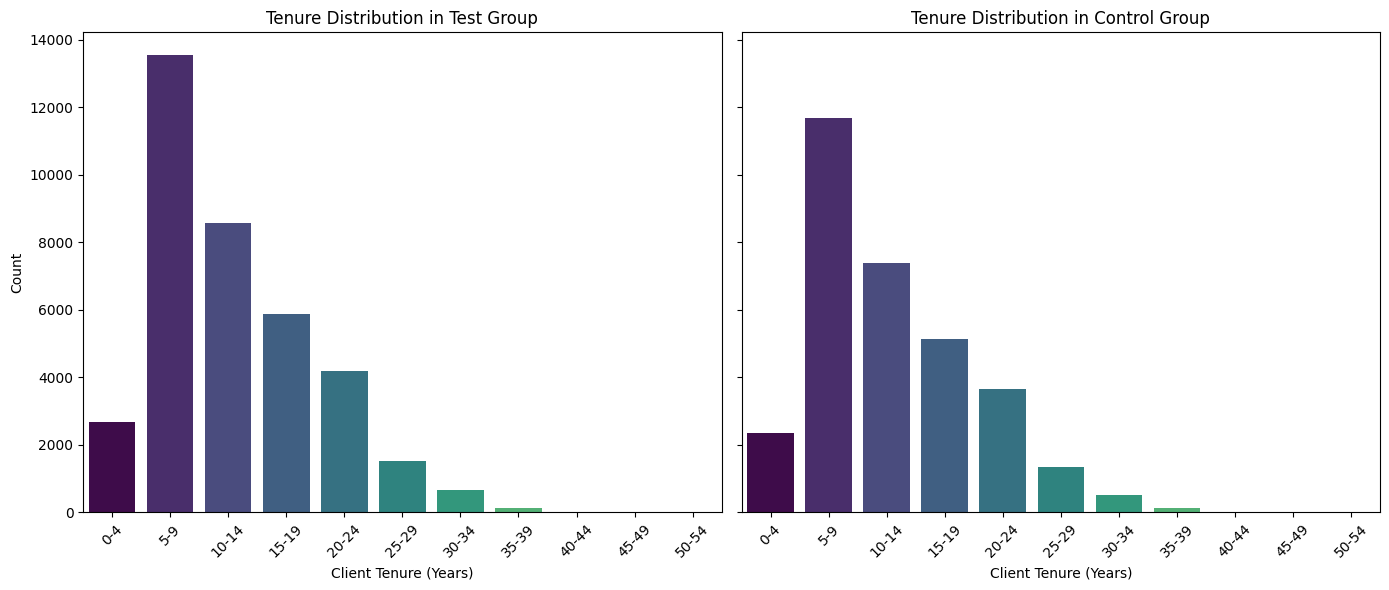

In [40]:
# Create tenure bins of 5 years
bins = np.arange(0, df_final['clnt_tenure_yr'].max() + 5, 5)
labels = [f'{i}-{i+4}' for i in bins[:-1]]

# Bin the tenures
df_final['tenure_bin'] = pd.cut(df_final['clnt_tenure_yr'], bins=bins, labels=labels, right=False)

# Create separate DataFrames for Test and Control groups with tenure bins
df_test_tenure = df_final[df_final['variation'] == 'Test']['tenure_bin'].value_counts().sort_index().reset_index(name='count').rename(columns={'index': 'tenure_bin'})
df_control_tenure = df_final[df_final['variation'] == 'Control']['tenure_bin'].value_counts().sort_index().reset_index(name='count').rename(columns={'index': 'tenure_bin'})

# Setup figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True) # Share y axis for easy comparison

# Colors from the Viridis palette
colors = plt.cm.viridis(np.linspace(0, 1, len(df_test_tenure)))

# Bar chart for Test group
sns.barplot(data=df_test_tenure, x='tenure_bin', y='count', ax=axs[0], palette=colors)
axs[0].set_title('Tenure Distribution in Test Group')
axs[0].set_xlabel('Client Tenure (Years)')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Bar chart for Control group
sns.barplot(data=df_control_tenure, x='tenure_bin', y='count', ax=axs[1], palette=colors)
axs[1].set_title('Tenure Distribution in Control Group')
axs[1].set_xlabel('Client Tenure (Years)')
axs[1].tick_params(axis='x', rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


## Age Distribution

/tmp/ipykernel_6896/1548021459.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_6896/1548021459.py:19: UserWarning:

Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14

/tmp/ipykernel_6896/1548021459.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_6896/1548021459.py:25: UserWarning:

Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14



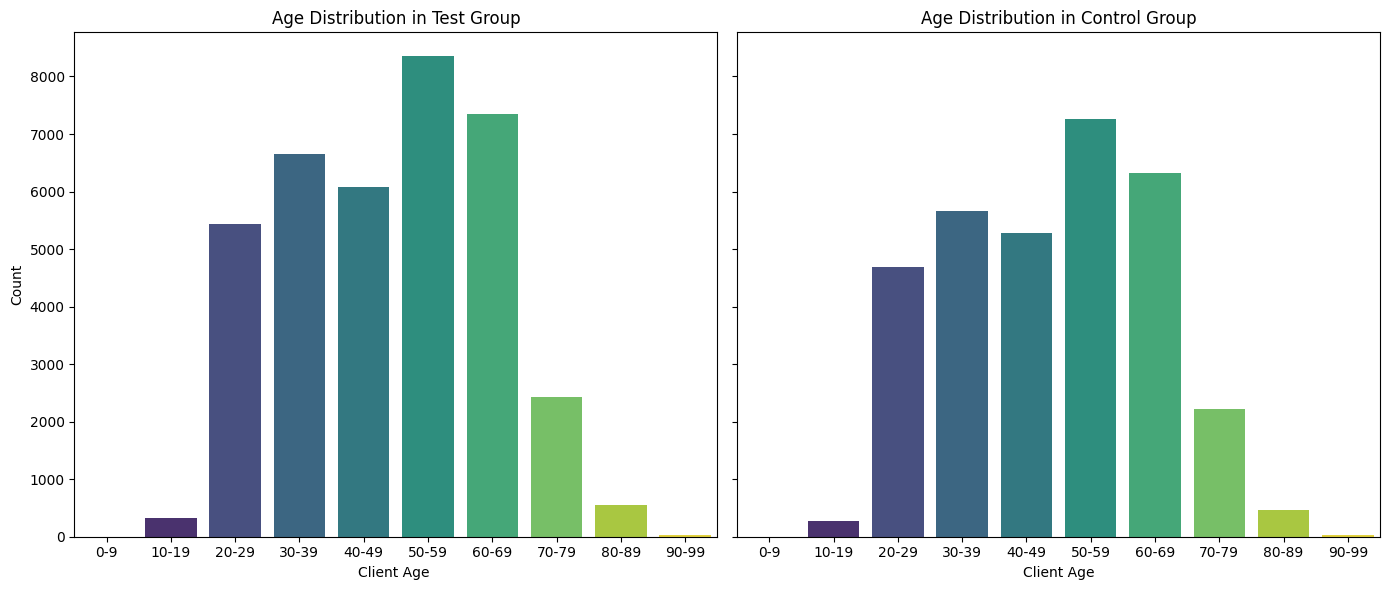

In [41]:
# Create age bins of 10 years
bins = np.arange(0, 110, 10)
labels = [f'{i}-{i+9}' for i in bins[:-1]]

# Bin the ages
df_final['age_bin'] = pd.cut(df_final['clnt_age'], bins=bins, labels=labels, right=False)

# Create separate DataFrames for Test and Control groups with age bins
df_test_age = df_final[df_final['variation'] == 'Test']['age_bin'].value_counts().sort_index().reset_index(name='count').rename(columns={'index': 'age_bin'})
df_control_age = df_final[df_final['variation'] == 'Control']['age_bin'].value_counts().sort_index().reset_index(name='count').rename(columns={'index': 'age_bin'})

# Setup figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True) # Share y axis for easy comparison

# Colors from the Viridis palette
colors = plt.cm.viridis(np.linspace(0, 1, len(df_test_age)))

# Bar chart for Test group
sns.barplot(data=df_test_age, x='age_bin', y='count', ax=axs[0], palette=colors)
axs[0].set_title('Age Distribution in Test Group')
axs[0].set_xlabel('Client Age ')
axs[0].set_ylabel('Count')

# Bar chart for Control group
sns.barplot(data=df_control_age, x='age_bin', y='count', ax=axs[1], palette=colors)
axs[1].set_title('Age Distribution in Control Group')
axs[1].set_xlabel('Client Age')


# Show the plot
plt.tight_layout()
plt.show()



In [42]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Ensure date column is in datetime format
df_final['date'] = pd.to_datetime(df_final['date'])

# Add a 'week' column to the DataFrame
df_final['week'] = df_final['date'].dt.to_period('W').apply(lambda r: r.start_time)

# Calculate weekly completion rate for Test and Control variations
weekly_completion = df_final.groupby(['week', 'variation'])['completion'].mean().unstack()

# Perform Chi-square test for completion rates
contingency_table = pd.crosstab(df_final['variation'], df_final['completion'])
chi2_stat_completion, p_value_completion, _, _ = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = contingency_table.sum().sum()  # Total number of observations
min_dimension = min(contingency_table.shape) - 1  # Minimum dimension - 1
cramers_v = np.sqrt((chi2_stat_completion / n) / min_dimension)

# Print the results
print(f'Chi-square statistic for completion rates: {chi2_stat_completion}, p-value: {p_value_completion}')
print(f"Cramér's V for the association between variation and completion: {cramers_v}")

# Calculate Completion Rates
completion_rates = df_final.groupby('variation')['completion'].mean()
completion_rate_test = completion_rates.get('Test', 0)
completion_rate_control = completion_rates.get('Control', 0)
percentage_increase = ((completion_rate_test - completion_rate_control) / completion_rate_control) * 100 if completion_rate_control != 0 else float('inf')

print(f'Completion rate for Test group: {completion_rate_test}')
print(f'Completion rate for Control group: {completion_rate_control}')
print(f'Percentage increase in completion rate: {percentage_increase}%')

# Define the cost-effectiveness threshold (example: 0.05 or 5%)
cost_effectiveness_threshold = 0.05

# Define viridis-like colors for the variations
viridis_colors = plt.cm.viridis(np.linspace(0, 1, 256))
test_color = 'rgb({}, {}, {})'.format(*[int(c * 255) for c in viridis_colors[68]])
control_color = 'rgb({}, {}, {})'.format(*[int(c * 255) for c in viridis_colors[253]])

# Create a line+scatter plot
fig = go.Figure()

# Line+scatter for test data
fig.add_trace(go.Scatter(
    x=weekly_completion.index,
    y=weekly_completion['Test'],
    mode='lines+markers',
    name='Test Data',
    line=dict(shape='linear', color=test_color)
))

# Line+scatter for control data
fig.add_trace(go.Scatter(
    x=weekly_completion.index,
    y=weekly_completion['Control'],
    mode='lines+markers',
    name='Control Data',
    line=dict(shape='linear', color=control_color)
))

# Add cost-effectiveness threshold line
fig.add_trace(go.Scatter(
    x=weekly_completion.index,
    y=[cost_effectiveness_threshold] * len(weekly_completion),
    mode='lines',
    name='Cost-Effectiveness Threshold',
    line=dict(shape='linear', color='rgba(255, 0, 0, 0.6)', dash='dash')  # Red dashed line
))

# Update layout
fig.update_layout(
    title='Weekly Completion Rate for Test and Control Data with Cost-Effectiveness Threshold',
    xaxis_title='Week',
    yaxis_title='Completion Rate',
    yaxis_tickformat=',.0%',
    legend_title_text='Data Source',
    template='plotly_white'
)

# Show the plot
fig.show()


Chi-square statistic for completion rates: 525.6875674507415, p-value: 2.449904079356561e-116
Cramér's V for the association between variation and completion: 0.0870173611252898
Completion rate for Test group: 0.5857757461683248
Completion rate for Control group: 0.49886769039863504
Percentage increase in completion rate: 17.421063228256642%


1. Design Effectiveness: Demographic Distributions

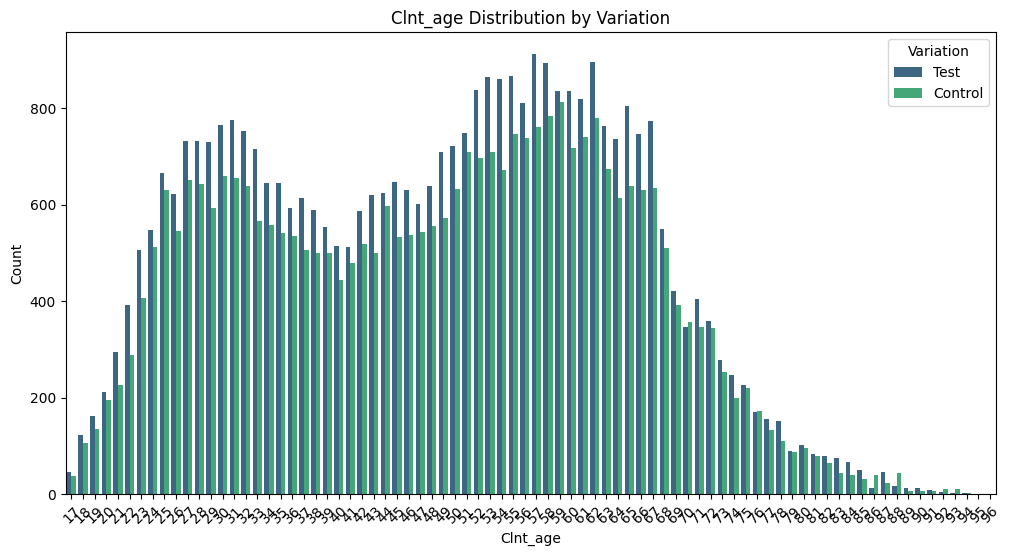

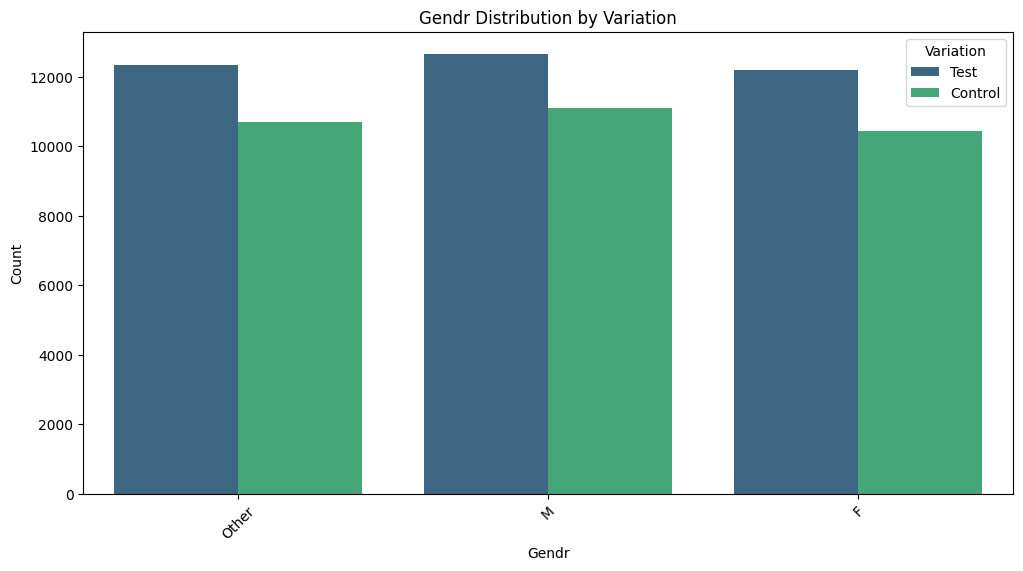

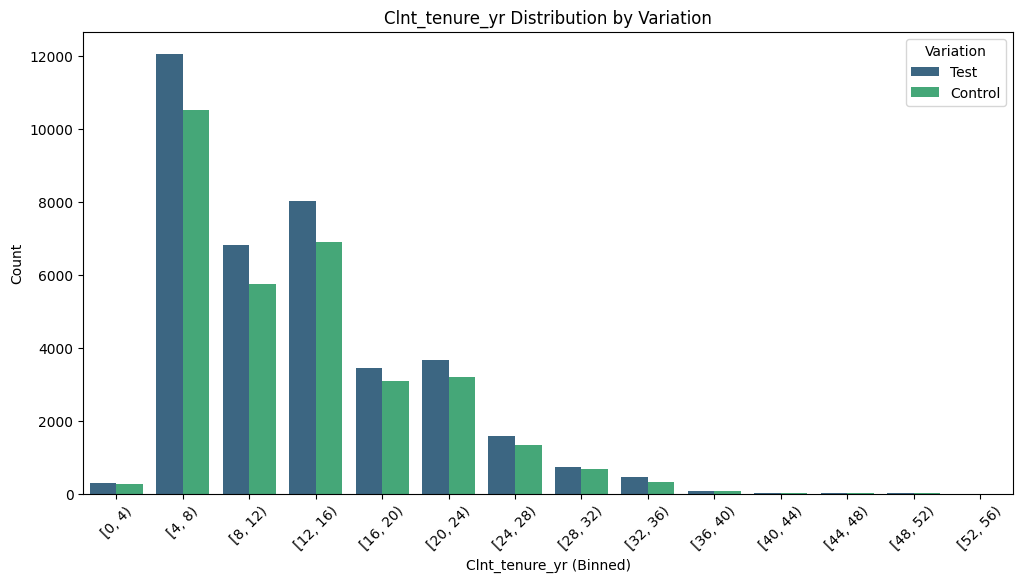

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_demographics(df, column, bin_size=None):
    plt.figure(figsize=(12, 6))
    if bin_size and pd.api.types.is_numeric_dtype(df[column]):
        bins = range(0, int(df[column].max() + bin_size), bin_size)
        df[f'{column}_binned'] = pd.cut(df[column], bins=bins, right=False)
        sns.countplot(data=df, x=f'{column}_binned', hue='variation', palette='viridis')
        plt.xlabel(f'{column.capitalize()} (Binned)')
    else:
        sns.countplot(data=df, x=column, hue='variation', palette='viridis')
        plt.xlabel(column.capitalize())
    plt.title(f'{column.capitalize()} Distribution by Variation')
    plt.ylabel('Count')
    plt.legend(title='Variation')
    plt.xticks(rotation=45)
    plt.show()

# Plot demographic distributions
plot_demographics(df_final, 'clnt_age')
plot_demographics(df_final, 'gendr')
plot_demographics(df_final, 'clnt_tenure_yr', bin_size=4)


In [44]:
df_final['date'] = pd.to_datetime(df_final['date'])
weekly_completion = df_final.groupby(['week', 'variation'])['completion'].mean().unstack()
weekly_error = df_final.groupby(['week', 'variation'])['is_error'].mean().unstack()

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
weekly_completion.plot(ax=ax[0], title='Weekly Completion Rate')
weekly_error.plot(ax=ax[1], title='Weekly Error Rate')
plt.tight_layout()
plt.show()


KeyError: 'Column not found: is_error'

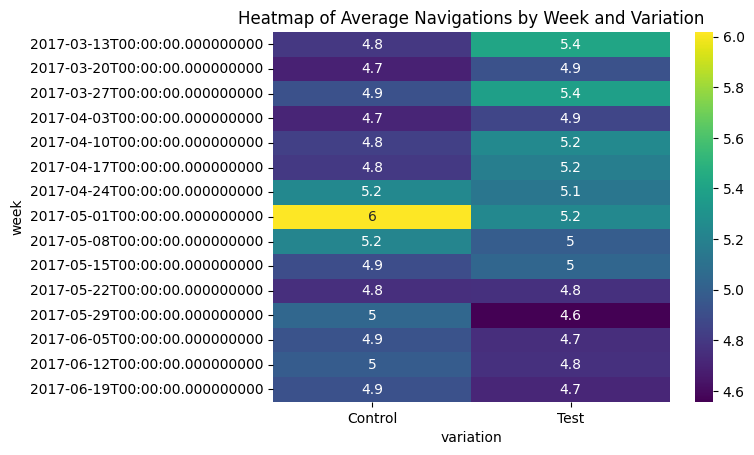

In [ ]:
import seaborn as sns

# Example heatmap for navigations
navigation_data = df_final.pivot_table(index='week', columns='variation', values='navigations_bt_start_last', aggfunc='mean')
sns.heatmap(navigation_data, cmap='viridis', annot=True)
plt.title('Heatmap of Average Navigations by Week and Variation')
plt.show()


In [ ]:
df_final.shape(10)

NameError: name 'df_final' is not defined